<a href="https://colab.research.google.com/github/kerbostudy/ML-DEEP-program/blob/main/%5B%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%5DK_means_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1]  k-means 평균값을 자동으로 찾아줌
이 평균값을 cluster enter, centroid  라고 함


In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-05-08 03:45:51--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-05-08 03:45:51--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-05-08 03:45:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

[2] 샘플개수, 너비, 높이 의 3차원 배열을 샘플개수, 너비*높이 크기를 가진 2차원 배열려

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

[3]사이킷 런의 K-means 평균 알고리즘은 sklearn.cluster 모듈 아래 KMeans 클래스에서 구현됨

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)


[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [5]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)

  rows =int(np.ceil(n/10))
  cols = n if rows <  2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()


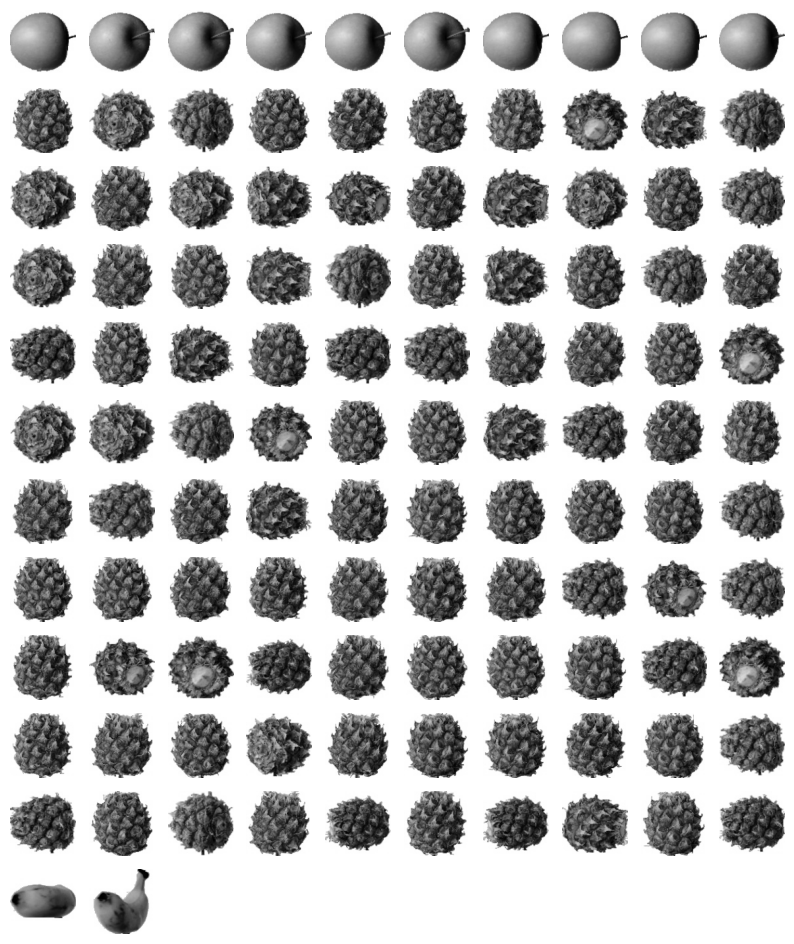

In [8]:
draw_fruits(fruits[km.labels_ == 0])

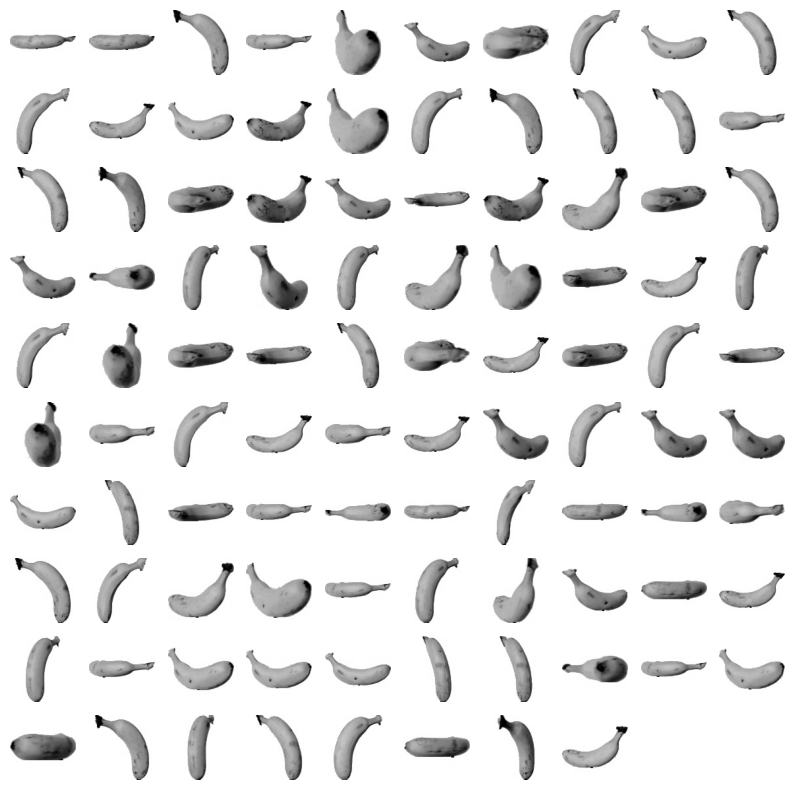

In [9]:
draw_fruits(fruits[km.labels_ == 1])

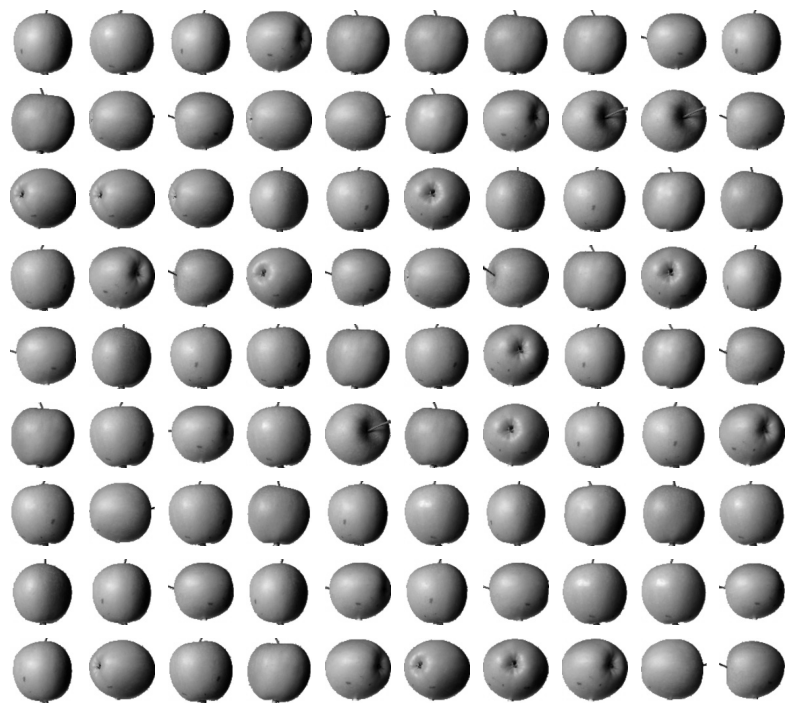

In [10]:
draw_fruits(fruits[km.labels_ == 2])

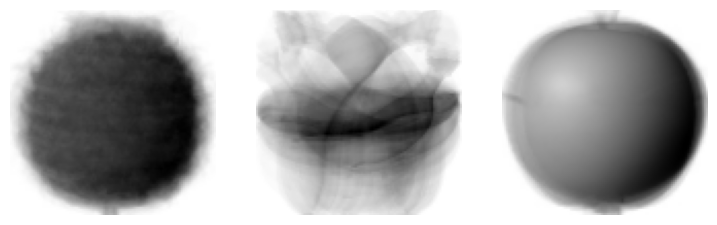

In [17]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [18]:
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


In [19]:
print(km.predict(fruits_2d[100:101]))

[0]


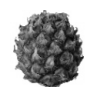

In [20]:
draw_fruits(fruits[100:101])

In [21]:
print(km.n_iter_)

4


[[3400.24197319 8837.37750892 5279.33763699]
 [3222.27763743 7750.19840105 4826.22915798]
 [3478.68685885 8638.9906387  4655.54849577]]
[0 0 0]


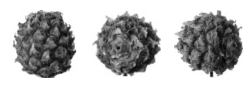

In [24]:
print(km.transform(fruits_2d[100:103]))
print(km.predict(fruits_2d[100:103]))
draw_fruits(fruits[100:103])

[[4661.3649493  8642.61845541 3094.2021583 ]
 [5353.49325819 9030.55531495 2621.1643038 ]
 [4622.86793264 8494.99543011 3128.53032176]
 [5300.22503847 9132.8299753  3038.30448273]
 [5032.40691964 8461.52728232 2635.06533269]
 [4350.11675063 7855.57817995 4900.64521339]
 [4727.52939983 8558.2291995  2738.57038876]
 [4656.52135963 8677.20797817 2636.52441605]
 [5288.60342196 8360.33405924 2709.72461019]
 [5514.77511468 7956.78993771 3869.39936723]
 [4590.76940849 8352.57326294 3066.18213505]
 [4780.73450474 8636.78492775 2627.86222723]
 [4514.76430857 8529.94261235 2279.26277964]
 [5119.22643024 8334.41299737 3243.70032469]
 [5092.92077066 8857.76766405 2784.93156843]
 [4017.0062117  8037.67342153 3573.76137312]
 [5293.63820116 8349.30637291 2650.14999927]
 [5330.38339326 9291.31930344 3124.17254766]
 [4489.87288173 8987.62070343 5218.12036367]
 [4709.12721984 9412.19465778 3457.24290227]
 [5075.09989639 9631.54363359 3529.70760463]
 [4973.619492   8490.88025715 3242.18615148]
 [5037.077

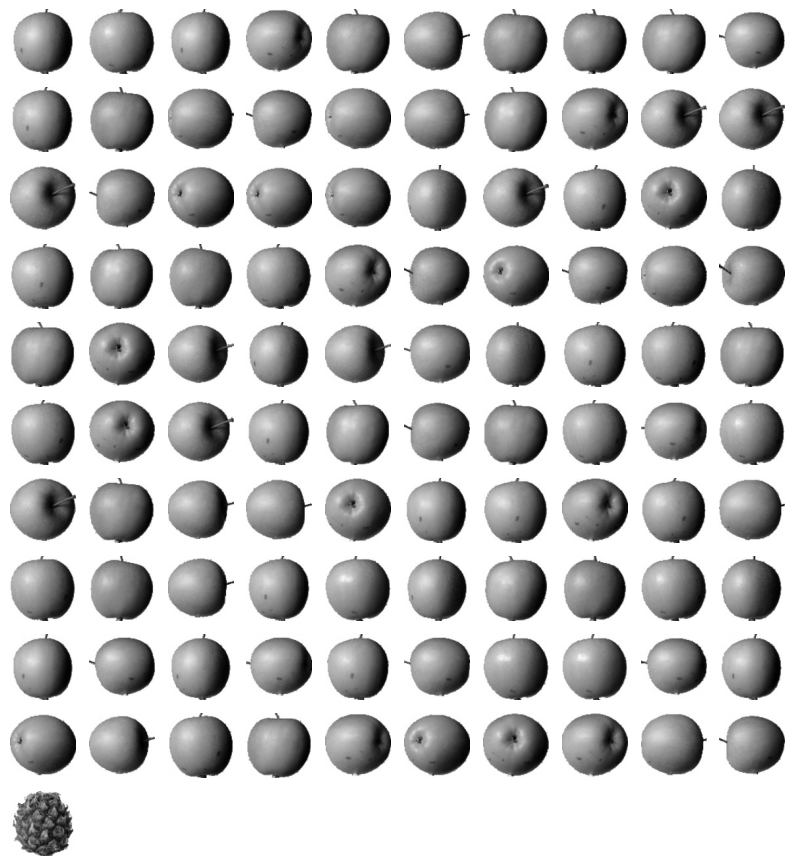

In [27]:
print(km.transform(fruits_2d[0:101]))
print(km.predict(fruits_2d[0:101]))
draw_fruits(fruits[0:101])

In [30]:
print(km.n_iter_)

4


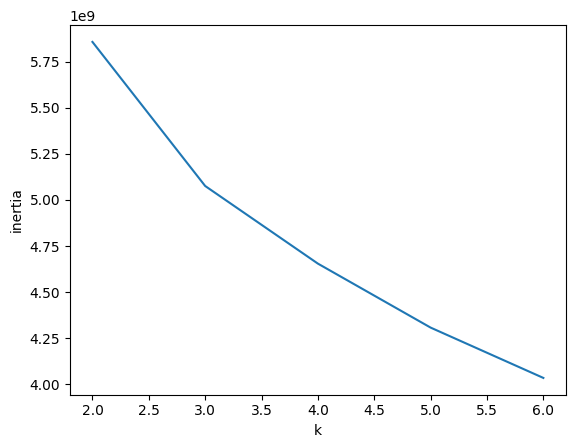

In [35]:
#############################################################
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, n_init='auto', random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

